In [48]:
%load_ext autoreload
%autoreload 2

import sys
import time
import os
sys.path.insert(0, '../')

# import embedding methods
from embedding.bernoulli import Bernoulli
from embedding.kl import KL
from embedding.matrix_factorization import MatrixFactorization

# import evaluation methods
from evaluation import evaluate_link_prediction
from evaluation import evaluate_node_classification
from evaluation import evaluate_node_clustering
# 
# import utils
from utils import graph_util
from utils import plot_util
from utils import model_util

# visualization
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Experiment 1

The results of the current experiment are stored at experiments/results/2020_01_25_22_02
Matrix_Fatorization_adjacency_1_1

Node classification evaluation has started...

mean accuracy score: 0.3457746478873239
Model evaluation took: 1.251554012298584 seconds
Matrix_Fatorization_adjacency_2_1

Node classification evaluation has started...

mean accuracy score: 0.43596579476861164
Model evaluation took: 1.3396532535552979 seconds
Matrix_Fatorization_adjacency_3_1

Node classification evaluation has started...

mean accuracy score: 0.49275653923541246
Model evaluation took: 1.1523470878601074 seconds
Matrix_Fatorization_adjacency_4_1

Node classification evaluation has started...

mean accuracy score: 0.5856639839034206
Model evaluation took: 1.1374247074127197 seconds
Matrix_Fatorization_adjacency_8_1

Node classification evaluation has started...

mean accuracy score: 0.603672032193159
Model evaluation took: 1.139695405960083 seconds
Matrix_Fatorization_adjacency_12_1

Node classificat

mean accuracy score: 0.33576458752515087
Model evaluation took: 34.16129112243652 seconds
Matrix_Fatorization_NetMF_2_1

Node classification evaluation has started...

mean accuracy score: 0.6026659959758551
Model evaluation took: 33.93872833251953 seconds
Matrix_Fatorization_NetMF_3_1

Node classification evaluation has started...

mean accuracy score: 0.6951710261569417
Model evaluation took: 34.0290253162384 seconds
Matrix_Fatorization_NetMF_4_1

Node classification evaluation has started...

mean accuracy score: 0.7253521126760564
Model evaluation took: 34.280861139297485 seconds
Matrix_Fatorization_NetMF_8_1

Node classification evaluation has started...

mean accuracy score: 0.7803822937625755
Model evaluation took: 34.08454990386963 seconds
Matrix_Fatorization_NetMF_12_1

Node classification evaluation has started...

mean accuracy score: 0.7860160965794769
Model evaluation took: 33.95902991294861 seconds
Matrix_Fatorization_NetMF_16_1

Node classification evaluation has started

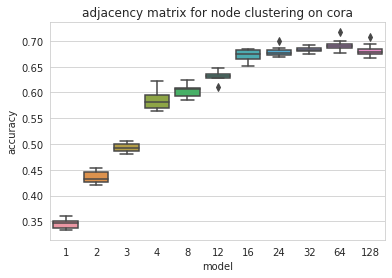

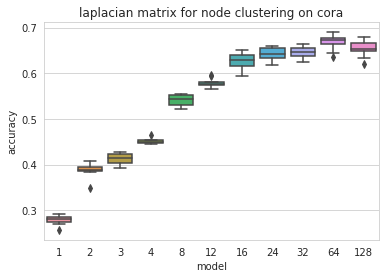

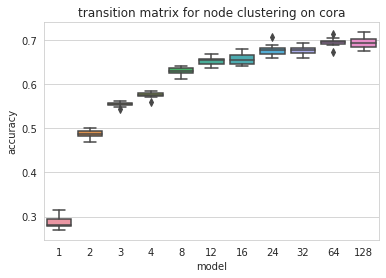

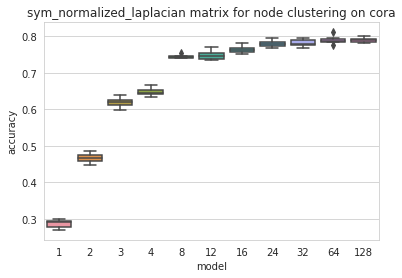

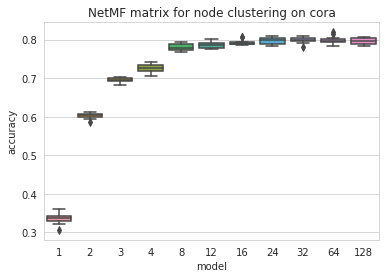

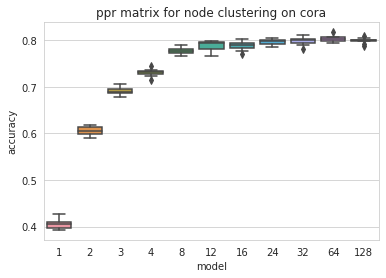

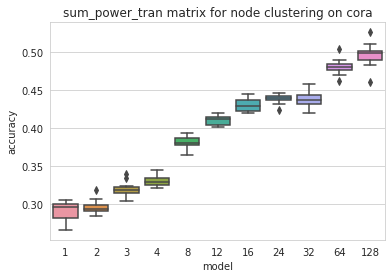

In [49]:
# Experiment 1

exp = {
    "max_epochs": 10000,
    "learning_rate": 1e-2, #Adam
    "weight_decay": 1e-7,
    
    "link_prediction":False,
    "link_pred_num_rounds": 10,
    "link_pred_train_ratio": 0.8,
    "link_pred_eval_every_n_steps": 20,
    "link_pred_edge_emb_method": "average",
    
    "node_classification": True,
    "node_class_num_rounds": 10,
    "node_class_train_ratio": 0.2,
    "node_class_eval_every_n_steps": 50,
    
    "node_clustering": False,
    "node_clustering_num_rounds": 10,
    "node_clustering_eval_epochs": 2,
}


datasets = ["cora","hvr","citeseer", "polblogs"]#, "cora",citeseer", "polblogs","hvr"] 


datasets = ["cora"]#, "cora",citeseer", "polblogs","hvr"] 






#TO DO:
#Laplacian (nobrainer) : Till done
#NetMF : Tillcd
#PPR : Till done(?)
#Sum_Power_Tran : Jan
#Sim_Rank : Jan
#Big Task: what to do with W / U Epsilon : Jan
#possible: Forest Fire / Stochastic Optimization
similarities= ['adjacency','laplacian','transition', 'sym_normalized_laplacian','NetMF','ppr','sum_power_tran']

for sim in similarities:


#Matrix Factorization
    model_1 = MatrixFactorization(embedding_dimension=1, similarity_measure=sim, embedding_option=1) 
    model_2 = MatrixFactorization(embedding_dimension=2, similarity_measure=sim, embedding_option=1) 
    model_3 = MatrixFactorization(embedding_dimension=3, similarity_measure=sim, embedding_option=1) 
    model_4 = MatrixFactorization(embedding_dimension=4, similarity_measure=sim, embedding_option=1) 
    model_8 = MatrixFactorization(embedding_dimension=8, similarity_measure=sim, embedding_option=1) 
    model_12 = MatrixFactorization(embedding_dimension=12, similarity_measure=sim, embedding_option=1) 
    model_16 = MatrixFactorization(embedding_dimension=16, similarity_measure=sim, embedding_option=1) 
    model_24 = MatrixFactorization(embedding_dimension=24, similarity_measure=sim, embedding_option=1) 
    model_32 = MatrixFactorization(embedding_dimension=32, similarity_measure=sim, embedding_option=1) 
    model_64 = MatrixFactorization(embedding_dimension=64, similarity_measure=sim, embedding_option=1) 
    model_128 = MatrixFactorization(embedding_dimension=128, similarity_measure=sim, embedding_option=1) 


    embedding_methods = [
    model_1,model_2,model_3,model_4,model_8, model_12, model_16, model_24, model_32, model_64,model_128
           ]


    dset_NMI=[]
    dset_AUC=[]
    dset_ACC=[]
# setup folders to store experiment setup summary and results
    result_folder = plot_util.setup_folders_and_summary_files(exp, datasets, embedding_methods)
    print(f'The results of the current experiment are stored at experiments/{result_folder}')

    for dataset in datasets:
    
    # load dataset
        total_NMI=[]
        total_AUC=[]
        total_ACC=[]
        A, y = graph_util.load_dataset(dataset)
    
        for model in embedding_methods:
        
            print(model.get_method_summary())
            start = time.time()
        
            directory= 'results_plot/'+dataset+'/'+str(model._method_name)
            if(not os.path.isdir(directory)):
                os.mkdir(directory)
        
        # do link prediction
            if(exp["link_prediction"]):
                link_prediction_folder = result_folder + "/link_prediction"
                AUC= evaluate_link_prediction.expLP(A,dataset,model,exp["link_pred_num_rounds"],
                                           link_prediction_folder, train_ratio=exp["link_pred_train_ratio"], 
                                           edge_emb_method=exp["link_pred_edge_emb_method"],train_epochs=exp["max_epochs"],
                                           eval_epochs=exp["link_pred_eval_every_n_steps"], undirected=True)
                total_AUC.append(AUC)
            
                if(not os.path.isdir(directory+'/link_prediction')):
                    os.mkdir(directory+'/link_prediction')
                
                with open(directory+'/link_prediction/'+str(model._similarity_measure)+'_AUC_results.txt','w') as f:
                    for listitem in AUC:
                        f.write('%s\n' % listitem) 
                    
        # do node classification
            if(exp["node_classification"]):
                node_classification_folder = result_folder + "/node_classification"
                ACC = evaluate_node_classification.expNC(A,y,dataset,model,exp["node_class_num_rounds"],
                                               node_classification_folder, train_ratio=exp["node_class_train_ratio"],
                                               train_epochs=exp["max_epochs"],eval_epochs=exp["node_class_eval_every_n_steps"],undirected=True)
                total_ACC.append(ACC)
            
                if(not os.path.isdir(directory+'/node_classification')):
                    os.mkdir(directory+'/node_classification')
                
                with open(directory+'/node_classification/'+str(model._similarity_measure)+'_ACC_results.txt','w') as f:
                    for listitem in ACC:
                        f.write('%s\n' % listitem) 
         
        # do node clustering
            if(exp["node_clustering"]):
                node_clustering_folder = result_folder + "/node_clustering"
                NMI = evaluate_node_clustering.exp_Node_Clustering(A,y,dataset,model,exp["node_clustering_num_rounds"],
                                           node_clustering_folder , train_epochs=exp["max_epochs"],
                                           eval_epochs=exp["node_clustering_eval_epochs"],undirected=True)
                total_NMI.append(NMI)
            
                if(not os.path.isdir(directory+'/node_clustering')):
                    os.mkdir(directory+'/node_clustering')
                
                with open(directory+'/node_clustering/'+str(model._similarity_measure)+'_NMI_results.txt','w') as f:
                    for listitem in NMI:
                        f.write('%s\n' % listitem)    
                    
            end = time.time()
            print(f'Model evaluation took: {end-start} seconds')
        
        dset_NMI.append(total_NMI)
        dset_AUC.append(total_AUC)
        dset_ACC.append(total_ACC)
    
    
    
    headers= [  
            '1','2','3','4','8', '12', '16', '24','32', '64', '128'
         ]

        

    if(exp["node_clustering"]):
    
        for ds,NMI in zip(datasets,dset_NMI):  
            with open('results_plot/'+ds+'/dset_NMI.txt', 'wb') as f:
                pickle.dump(NMI, f)
            
        for ds,NMI in zip(datasets,dset_NMI):
            plt.figure()
            sns_plot = sns.boxplot(x=headers, y=NMI,order=headers );
            plt.title(sim+" matrix for node clustering on "+ds)
            plt.xlabel("dimensions")
            plt.ylabel("NMI")
            sns_plot.figure.savefig('plots/'+ds+'/NMI_'+sim+'.png')
            
         
  
    
    if(exp["link_prediction"]):
    
        for ds,AUC in zip(datasets,dset_AUC):    
            with open('results_plot/'+ds+'/dset_AUC.txt', 'wb') as f:
                pickle.dump(AUC, f)
                
        for ds,AUC in zip(datasets,dset_AUC):
            plt.figure()
            sns_plot = sns.boxplot(x=headers, y=AUC,order=headers);
            plt.title("Comparison for link prediction on "+ds)
            plt.xlabel("model")
            plt.ylabel("AUC")
            sns_plot.figure.savefig('plots/'+ds+'/AUC_'+sim+'.png')

    if(exp["node_classification"]):
    
        for ds,ACC in zip(datasets,dset_ACC):
            with open('results_plot/'+ds+'/dset_ACC.txt', 'wb') as f:
                pickle.dump(ACC, f)
            
        for ds,ACC in zip(datasets,dset_ACC):
            plt.figure()
            sns_plot = sns.boxplot(x=headers, y=ACC,order=headers);
            plt.title(sim+" matrix for node clustering on "+ds)
            plt.xlabel("model")
            plt.ylabel("accuracy")
            sns_plot.figure.savefig('plots/'+ds+'/ACC_'+sim+'.png')
        
        

In [30]:
  
headers= [  
            'adj','lap','ftr','nl','nf', 'fppr', 'fspt'
         ]


import pickle


if(exp["node_clustering"]):
    
    for ds,NMI in zip(datasets,dset_NMI):  
        with open('results_plot_comparison/'+ds+'/dset_NMI.txt', 'wb') as f:
            pickle.dump(NMI, f)
            
    for ds,NMI in zip(datasets,dset_NMI):
        plt.figure()
        sns_plot = sns.boxplot(x=headers, y=NMI);
        plt.title("Comparison for node clustering on "+ds)
        plt.xlabel("model")
        plt.ylabel("NMI")
        plt.ylim([0.,1.])
        sns_plot.figure.savefig('plots/'+ds+'/NMI_'+ds+'.png')
        



FileNotFoundError: [Errno 2] No such file or directory: 'results_plot_comparison/cora/dset_NMI.txt'

In [ ]:

for ds,NMI in zip(datasets,dset_NMI):
    plt.figure()
    sns_plot = sns.boxplot(x=headers, y=NMI);
    plt.title("Comparison for node clustering on "+ds)
    plt.xlabel("model")
    plt.ylabel("NMI")
    plt.ylim([0.,1.])
    sns_plot.figure.savefig('plots/'+ds+'/NMI_'+ds+'.png')

In [ ]:
for ds,AUC in zip(datasets,dset_AUC):
    plt.figure()
    sns_plot = sns.boxplot(x=headers, y=AUC);
    plt.title("Comparison for link prediction on "+ds)
    plt.xlabel("model")
    plt.ylabel("AUC")
    plt.ylim([0.,1.])
    sns_plot.figure.savefig('plots/'+ds+'/AUC_'+ds+'.png')

In [ ]:
for ds,ACC in zip(datasets,dset_ACC):
    plt.figure()
    sns_plot = sns.boxplot(x=headers, y=ACC);
    plt.title("Comparison for node classification on "+ds)
    plt.xlabel("model")
    plt.ylabel("accuracy")
    plt.ylim([0.,1.])
    sns_plot.figure.savefig('plots/'+ds+'/ACC_'+ds+'.png')